# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-05-15 15:25:03.459715: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-15 15:25:03.459904: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 15:25:03.462069: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 15:25:03.489039: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 15:25:04.004713: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 100
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, boost=1, seed=12345)
# plt.imshow(model.hidden_weights[0], cmap="coolwarm")
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [50]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1101/1200:	 accuracy 8.000%	 loss 35.839%
Epoch 1102/1200:	 accuracy 9.000%	 loss 51.267%
Epoch 1103/1200:	 accuracy 11.000%	 loss 17.835%
Epoch 1104/1200:	 accuracy 6.000%	 loss 31.357%
Epoch 1105/1200:	 accuracy 6.000%	 loss 41.733%
Epoch 1106/1200:	 accuracy 12.000%	 loss 25.588%
Epoch 1107/1200:	 accuracy 7.000%	 loss 48.808%
Epoch 1108/1200:	 accuracy 11.000%	 loss 16.992%
Epoch 1109/1200:	 accuracy 11.000%	 loss 17.761%
Epoch 1110/1200:	 accuracy 11.000%	 loss 16.063%
Epoch 1111/1200:	 accuracy 9.000%	 loss 16.749%
Epoch 1112/1200:	 accuracy 10.000%	 loss 26.090%
Epoch 1113/1200:	 accuracy 12.000%	 loss 26.745%
Epoch 1114/1200:	 accuracy 14.000%	 loss 19.376%
Epoch 1115/1200:	 accuracy 13.000%	 loss 20.106%
Epoch 1116/1200:	 accuracy 8.000%	 loss 38.200%
Epoch 1117/1200:	 accuracy 5.000%	 loss 59.988%
Epoch 1118/1200:	 accuracy 10.000%	 loss 41.890%
Epoch 1119/1200:	 accuracy 7.000%	 loss 54.122%
Epoch 1120/1200:	 accuracy 11.000%	 loss 33.475%
Epoch 1121/1200:	 accuracy 13

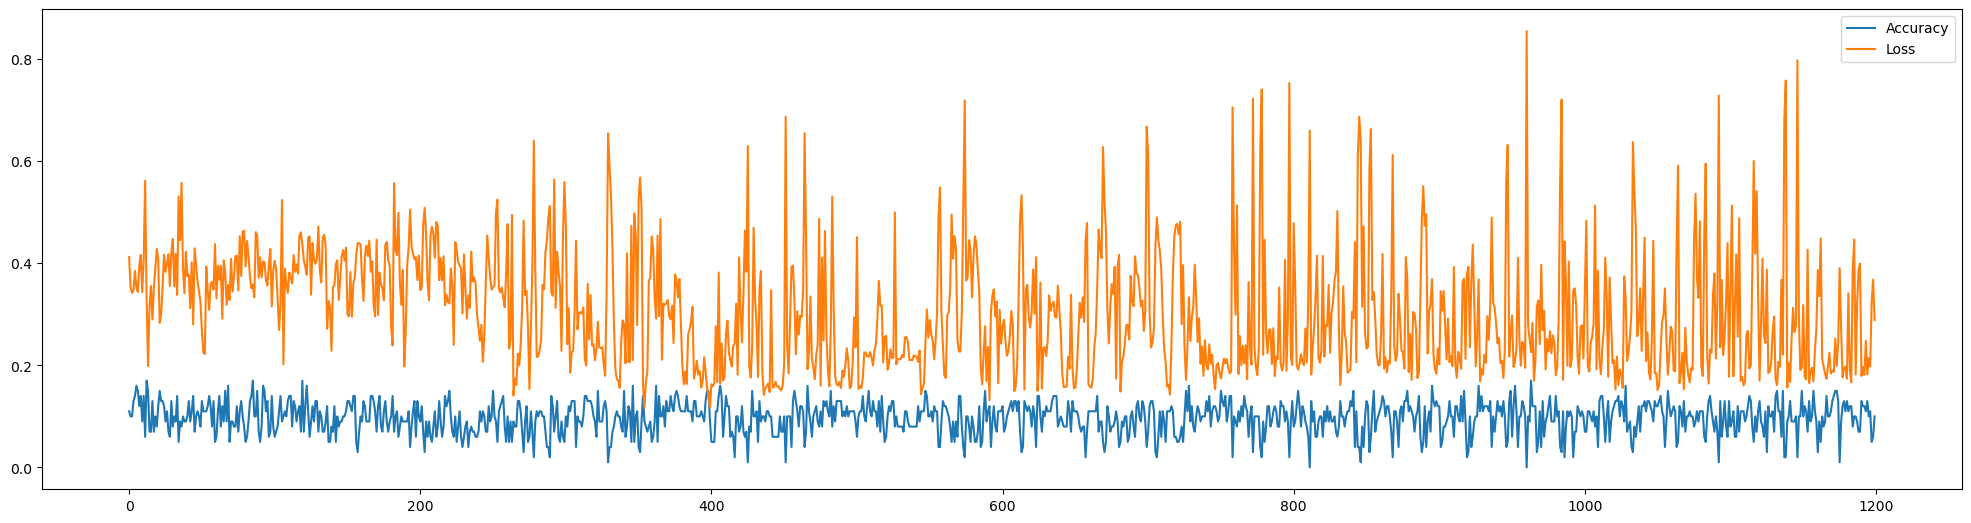

In [51]:
fig = plt.figure().add_axes([0,0,3,1])
fig.plot(model.history['accuracy'])
fig.plot(model.history['loss'])
plt.legend(["Accuracy", "Loss"])
plt.show()

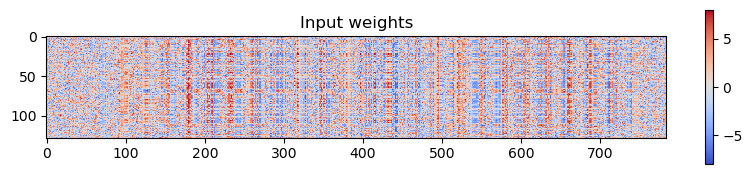

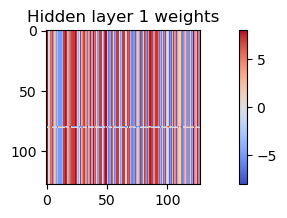

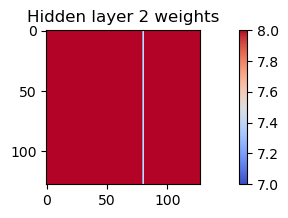

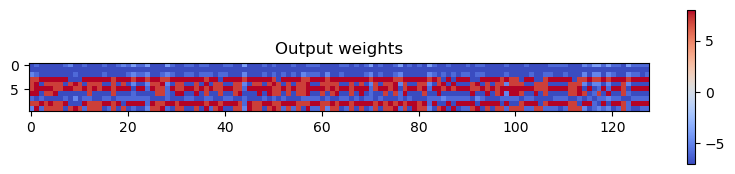

In [52]:
def show_weights(weights, title=None):
    plt.figure(figsize = (10, 2))
    plt.imshow(weights, cmap="coolwarm")
    plt.colorbar(orientation="vertical")
    plt.title(title)
    plt.show()

show_weights(model.input_weights, "Input weights")
for l in range(model.config["layers"] - 1):
    show_weights(model.hidden_weights[l], f"Hidden layer {l + 1} weights")
show_weights(model.output_weights, "Output weights")
# model.output_weights

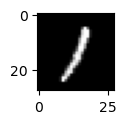

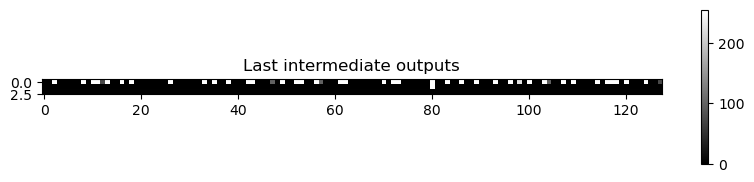

[0 0 0 0 0 0 0 0 0 0] --> 0


In [53]:
plt.figure(figsize = (1, 1))
plt.imshow(train_images[N-1].reshape(28, 28), cmap="grey")
plt.show()
# for l in range(model.config["layers"]):
#     print(model.last_intermediate_outputs[l])
plt.figure(figsize = (10, 2))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="vertical")
plt.title("Last intermediate outputs")
plt.show()
print(model.last_outputs, "-->", model.last_answer)